# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The classification goal is to predict if the client will subscribe a term deposit (variable y). The data set collected from the common and powerful dataset repository for machine learing called UCI Machine Learning repository. The dataset is related with direct markting compaigns (phone calls) of a Portuguess banking institution. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The data represents for four marking compaigns.
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] 

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

### Import tools

In [1]:
#Import data reading and visualization tools
import numpy as np
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
%matplotlib inline
cf.go_offline()
#import graphviz

#Import data Preprocessing tools from scikit learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder,OrdinalEncoder,LabelEncoder,PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector, RFE
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.tree import export_graphviz,export_text,plot_tree

# Import Models and classifiers of a machine learning classification problems from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

# Import Models performance evaluation tools from scikit learn
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

#Additional tools used for alternative way
from sklearn.metrics.pairwise import polynomial_kernel,rbf_kernel
import dabl
from sklearn import set_config
set_config(display='diagram')

In [2]:
#read in the dataset bank-additional-full.csv.
#This pandas read the data dicrect from the machine folder
bank_data= pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
#The pd.options.display.max_columns sets the max number of columns to be profiled.
pd.options.display.max_columns=None
bank_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [29]:
#Check the number of rows and columns of the dataset
bank_data.shape

(41188, 21)

Our dataset has 41188 rows and 21 columns

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



The data has 20 attributes or features and 1 output variable or desired atrget

In [14]:
#Checking if any of the features are missing values or need to be coerced to a different data type.
bank_data.isna().sum()/bank_data.shape[0]*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

The data has no missing value, all attributes and target are have missing values.

# Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Exploratory Data Analysis

In [15]:
#The pandas datafFrame.info()is used to get a concise summary of the dataFrame.
#Helps to get a quick overview of the dataset, to do a data exploratory analysis.
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

From the above DataFrame.info(), the data has 41188 entries and 21 columns. Some of the features are in object data type and some of are int64 and float64. The target is in an object data type.

In [29]:
#This is a rondom checking of the data type
print(bank_data['age'].dtype)
print(bank_data['job'].dtype)

int64
object


In [32]:
#this is checking a data Series or DataFrame
print(type(bank_data))
print(type(bank_data['age']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
#Graping all the columns that has an object data type
#This loop below graping all columns of the data that has an object data type
columns=[]
for column in bank_data.columns:
    if bank_data[column].dtype=='object':
        columns.append(column)
    else:
        pass

In [33]:
# The numerical statistical descriptive of the data
bank_data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.The age is ranged betwen 17 to 98. All attributes have 41188 data pts. From this statistical result, the numerical feaures don't have a missing values.

In [86]:
# The categorical descriptive of the data
#This below statistcal summary includes the categorical describtive.
bank_data.describe(include='all')

age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week      duration      campaign  \
count   41188     41188  41188       41188  41188.000000  41188.000000   
unique      3         2     10           5           NaN           NaN   
top        no  cellular    may         thu           NaN           NaN   
freq    33950     26144  13769        8623           NaN           NaN   
mean      NaN       NaN    NaN         NaN    258.285010      2.567593   
std       NaN       NaN    NaN         NaN    259.279249      2.770014   
min       NaN       NaN    NaN         NaN      0.000000      1.000000   
25%       NaN       NaN    NaN         NaN    102.000000      1.000000   
50%       NaN       NaN    NaN         NaN    180.000000      2.000000   
75%       NaN       NaN    NaN         NaN    319.000000      3.000000   
max       NaN       NaN    NaN         NaN   4918.000000     56.000000   

               pdays      previous     poutcome  emp.var.rate  cons.price.idx  \
count   41188.000000  41188.000000        41188  41188.000000    41188.000000   
unique           NaN           NaN            3           NaN             NaN   
top              NaN           NaN  nonexistent           NaN             NaN   
freq             NaN           NaN        35563           NaN             NaN   
mean      962.475454      0.172963          NaN      0.081886       93.575664   
std       186.910907      0.494901          NaN      1.570960        0.578840   
min         0.000000      0.000000          NaN     -3.400000       92.201000   
25%       999.000000      0.000000          NaN     -1.800000       93.075000   
50%       999.000000      0.000000          NaN      1.100000       93.749000   
75%       999.000000      0.000000          NaN      1.400000       93.994000   
max       999.000000      7.000000          NaN      1.400000       94.767000   

        cons.conf.idx     euribor3m   nr.employed      y  
count    41188.000000  41188.000000  41188.000000  41188  
unique            NaN           NaN           NaN      2  
top               NaN           NaN           NaN     no  
freq              NaN           NaN           NaN  36548  
mean       -40.502600      3.621291   5167.035911    NaN  
std          4.628198      1.734447     72.251528    NaN  
min        -50.800000      0.634000   4963.600000    NaN  
25%        -42.700000      1.344000   5099.100000    NaN  
50%        -41.800000      4.857000   5191.000000    NaN  
75%        -36.400000      4.961000   5228.100000    NaN  
max        -26.900000      5.045000   5228.100000    NaN

For object data (e.g. strings or timestamps), the result’s index will include unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency.

In [87]:
#check either thetarget classes are balanced or not
print(bank_data['y'].unique())
print(f'The sum of no values of the target:{sum(bank_data["y"]=="no")}')
print(f'The sum of yes values of the target:{sum(bank_data["y"]=="yes")}')


['no' 'yes']
The sum of no values of the target:36548
The sum of yes values of the target:4640


As we can see, the distribution of the target classes are imbalanced.

In [88]:
#categorical features unique values
## bank client data:
print(bank_data['job'].unique())
print(bank_data['marital'].unique())
print(bank_data['education'].unique())
print(bank_data['default'].unique())
print(bank_data['housing'].unique())
print(bank_data['loan'].unique())
print('\n')

# related with the last contact of the current campaign:
print(bank_data['contact'].unique())
print(bank_data['month'].unique())
print(bank_data['day_of_week'].unique())
print('\n')

## other attributes:
print(bank_data['poutcome'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']


['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']


['nonexistent' 'failure' 'success']


### Data Visualization

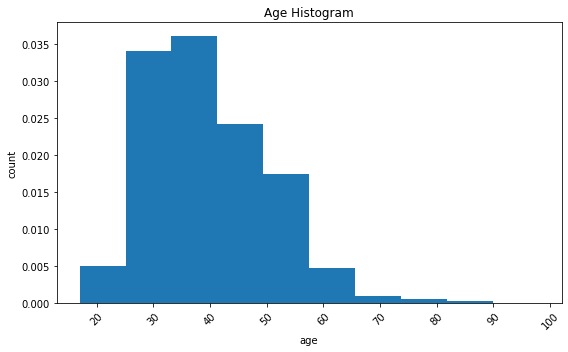

In [109]:
# visualizing using a distribution plot
#the historam of the age using the matplotlib 
fig=plt.figure(figsize=(8,5))
plt.hist(bank_data['age'], bins=10,density=True)
plt.title('Age Histogram')
plt.ylabel('count')
plt.xlabel('age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above matplotlib graph, the age data set are not symmetrical. The graph is skewed to the right, most of the data falls to the right of the graph's peak. A right-skewed histogram is a type of histogram in which the peak of the graph lies to the left of the middle value or the median.
A right-skewed histogram has a definite relationship between its mean, median, and mode which can be written as mean > median > mode. 

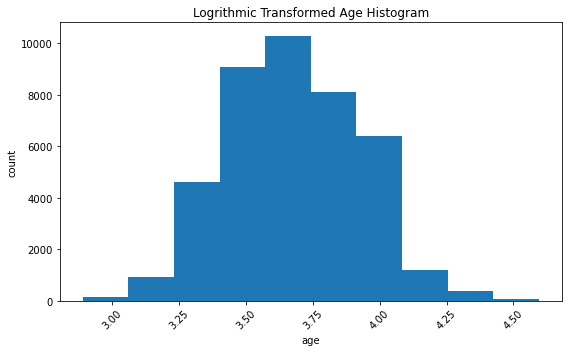

In [98]:
#the historam of the a logarithmic transformed age data using the matplotlib 
fig=plt.figure(figsize=(8,5))
plt.hist(np.log1p(bank_data['age']), bins=10)
plt.title('Logrithmic Transformed Age Histogram')
plt.ylabel('count')
plt.xlabel('age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This above graph is a logarithmic tramformed of an age dataset. The graph is almost symmetrical, that mean the mean=median=mode. The peak of the graph is at the middle. 


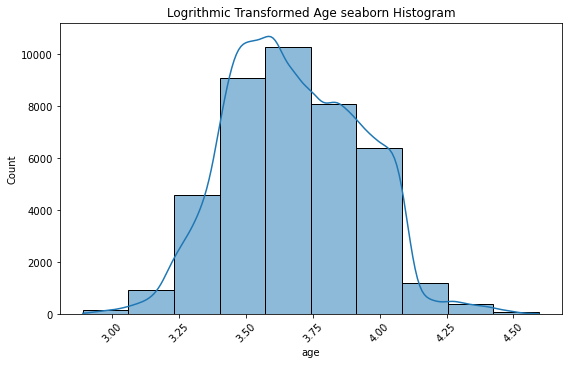

In [99]:
#Seaborn age data set histogram
fig=plt.figure(figsize=(8,5))
sns.histplot(np.log1p(bank_data['age']), bins=10, kde=True)
plt.title('Logrithmic Transformed Age seaborn Histogram')
plt.xlabel('age')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

This above graph is a matplotlib based seaborn histogram. The age data set is a logarithmic tranformed.
The graph is almost symmetrical, that mean the mean=median=mode. The peak of the graph is at the middle. 
The Kernel Density Estimate (KDE) Plot allows us to estimate the probability density function of the continuous.

In [26]:
#Plotly histogram
fig=plt.figure(figsize=(8,4))
fig=px.histogram(np.log1p(bank_data['age']))
fig.show()

<Figure size 576x288 with 0 Axes>

This nice a plotly histogram graph also quantitatively shows the histogram of the age dataset. The plotly Python library is an interactive, open-source plotting library.Tha maximum point has 3.465736 value and 1947 count. 

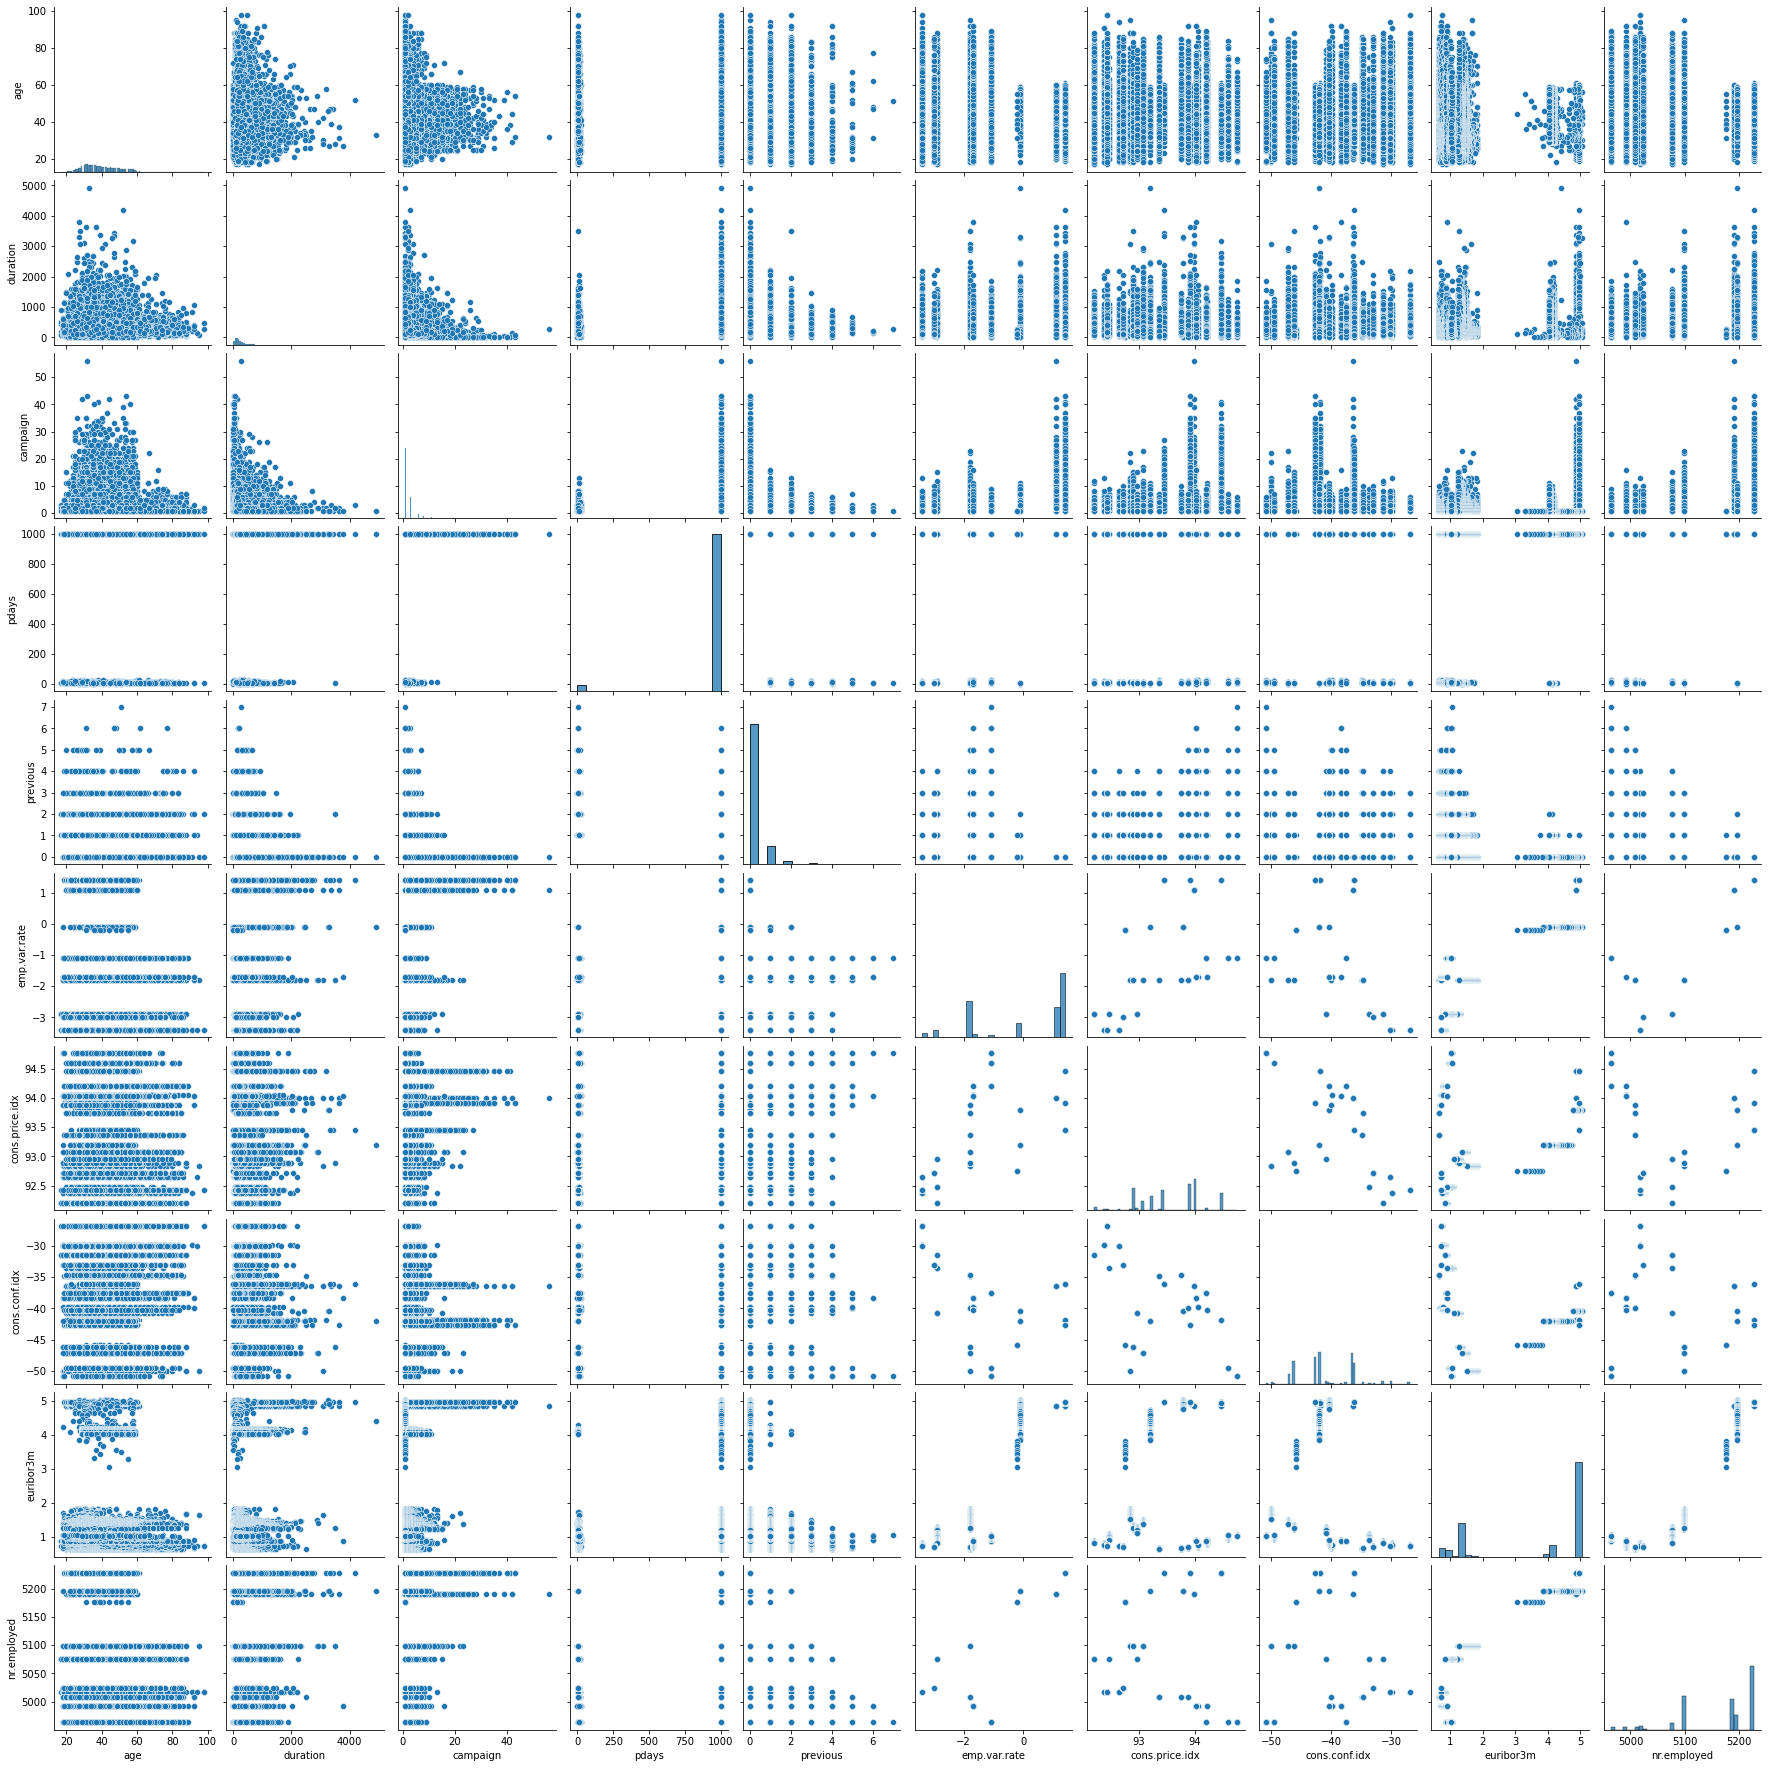

In [80]:
#A pairplot seaborn 
# A seaborn pairplot shows a correlation of the attributs one to each other. 
#The result below tells no features have a linear correlation
sns.pairplot(bank_data)

<Figure size 576x360 with 0 Axes>

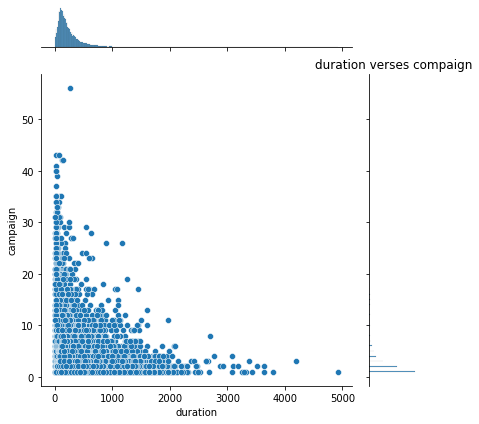

In [4]:
#a seaborn of duration verses compain
#This function provides a convenient interface to the ‘JointGrid’ class, with several canned plot kinds.
fig=plt.figure(figsize=(8,5))
sns.jointplot(data=bank_data,x ='duration',y='campaign', kind='scatter')
plt.title('duration verses compaign')
plt.ylabel('Compaign')
plt.xlabel('duration')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

A seaborn scatter plot of duration and compaign data sets are shown above. The data sets do not have a linear relationship. 

<Figure size 576x360 with 0 Axes>

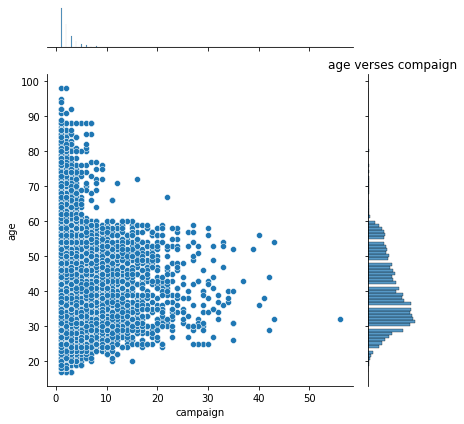

In [5]:
#a seaborn of duration verses compain
fig=plt.figure(figsize=(8,5))
sns.jointplot(data=bank_data,x ='campaign',y='age', kind='scatter')
plt.title('age verses compaign')
plt.ylabel('age')
plt.xlabel('campaign')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<Figure size 576x360 with 0 Axes>

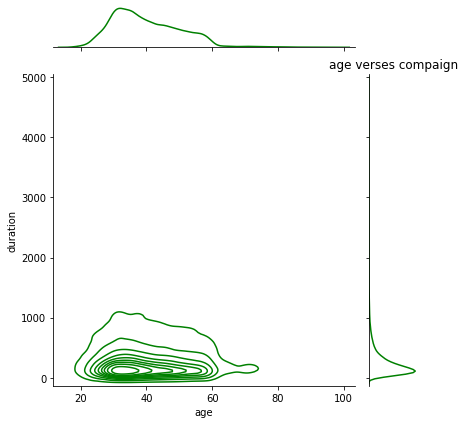

In [12]:
#a seaborn of duration verses compain
fig=plt.figure(figsize=(8,5))
sns.jointplot(data=bank_data,x ='age',y='duration', kind='kde', color='green')
plt.title('age verses compaign')
plt.ylabel('age')
plt.xlabel('duration')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

From the seaborn pairplot and scatter jointplot, the data is low correlated to each other. There is no a linear relationship among the features. They are highly in correlated attributes.

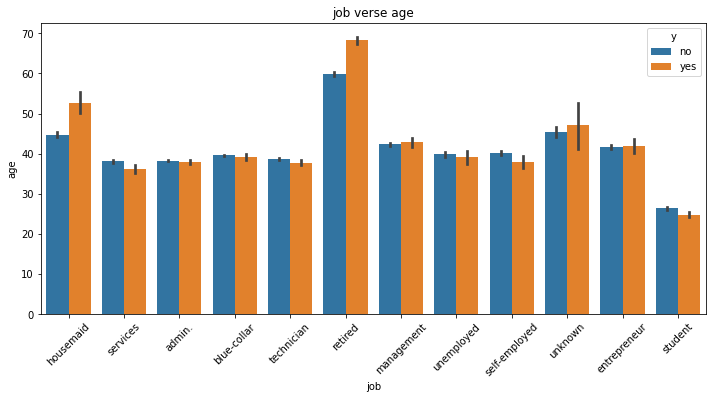

In [107]:
# Visualizing using a categorical tools
#a seabron bar plot of age distribution to the job type
fig=plt.figure(figsize=(10,5))
sns.barplot(data=bank_data,x='job',y='age',hue='y')
plt.title('job verse age')
plt.ylabel('age')
plt.xlabel('job')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

This is a seaborn barplot graph of the job to age dataset. From the graph a retired people are higher in number to subscribe the term deposit and student lower numbe,
which make sence. The student still are dependent , they use their paranets cards. 

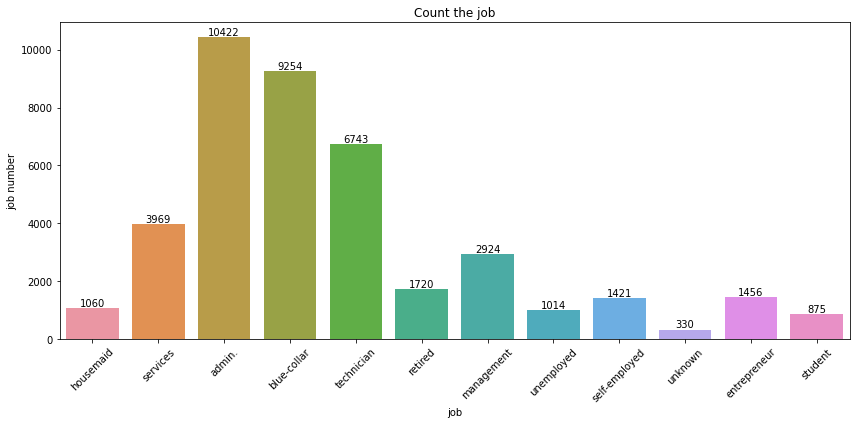

In [7]:
# seaborn countplot 
plt.figure(figsize = (12,6))
plot = sns.countplot( data=bank_data,x ='job')
plt.xticks(rotation = 45)
for i in plot.patches:
    plot.annotate(i.get_height(), 
                        (i.get_x() + i.get_width() / 2.0, 
                         i.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count the job")
plt.xlabel("job")
plt.ylabel("job number")
plt.tight_layout()
plt.show()

This graph tried to count the job total number form the whole datset. From the total dataset the admin job has a higher number 10422 followed by blue-collar 9254.The student has the least number, but there are 330 unknown jobs.


In [28]:
#A plotly Bar plot of job verses to age
fig=go.Figure()
fig.add_trace(go.Bar(x=bank_data['job'],y=bank_data['age']))
fig.update_layout(legend_title_text = "Job vs age potly graph")
fig.update_xaxes(title_text="job")
fig.update_yaxes(title_text="age")
fig.show()

The admin has 10422 values, which is the highest number, with 330 unknown minimum number

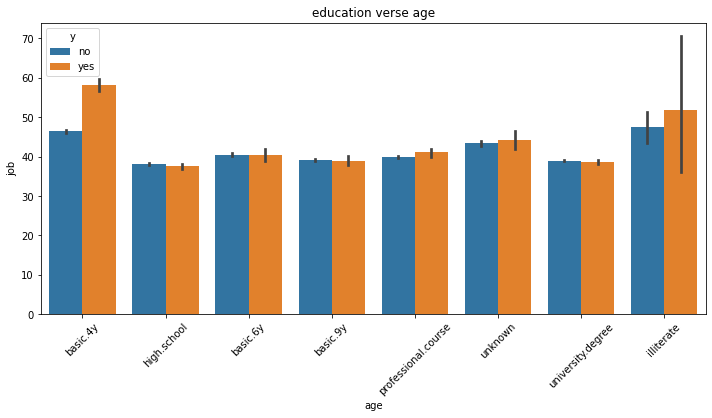

In [105]:
#a seabron bar plot of age distribution to the job type
fig=plt.figure(figsize=(10,5))
sns.barplot(data=bank_data,x='education',y='age',hue='y')
plt.title('education verse age')
plt.ylabel('education')
plt.xlabel('age')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

From the total number of education status, the university degree holder are among the highest number. There only 18 people who has illitrate rank.

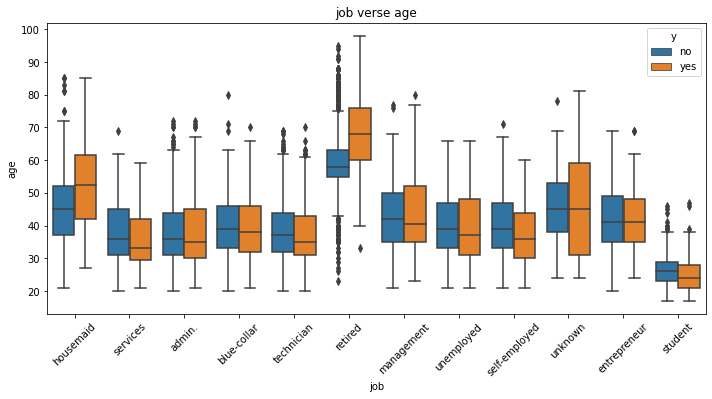

In [6]:
# A seaborn boxplot
#it shows the distribution of quantitative data in a way that facilitates 
#comparisons between variables or across levels of a categorical variable. 
fig=plt.figure(figsize=(10,5))
sns.boxplot(data=bank_data,x='job',y='age',hue='y')
plt.title('job verse age')
plt.ylabel('age')
plt.xlabel('job')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

This beatifull boxplot helps to easily graps the average numbers of the jobs those are subscribed or not. The retired have got an average age highest age who subscribed the term deposite. 

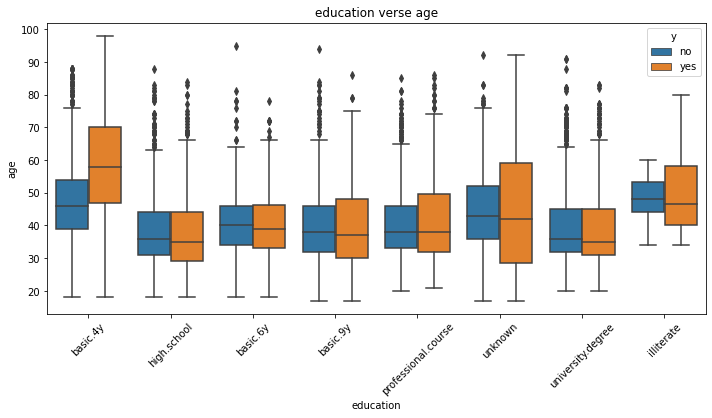

In [7]:
# A seaborn boxplot
fig=plt.figure(figsize=(10,5))
sns.boxplot(data=bank_data,x='education',y='age',hue='y')
plt.title('education verse age')
plt.ylabel('age')
plt.xlabel('education')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

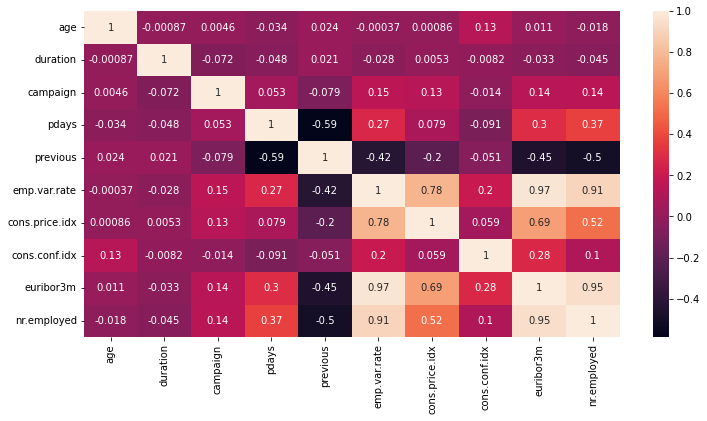

In [117]:
# A seaborn matrix plots
#Matrix plot has rows data, columns data, and values. 
#the annot argument shows the annotation relationship of the attributs.
#0 mean the features have weak relationship. 1 mean have a positive stong 
#correlation and -1 is a strong negative correlation.
corr=bank_data.corr()
fig =plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)

The seaborn heatmap is a matrix plot, that can helps to understand easy a correlation among the data set. From the heatmap plot the 'euribor3m' and 'emp.var.rate' have the highset strong positive relationship. On the other hand  the 'previous' and 'emp.var.rate' have a strong negative relationship. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [4]:
#This make column transformer transforms the categorical features into numerical dataset. 
#The OneHotEncoder used for the nominal data and ordinalEncoder for the ordinal data.
#An extractor also applied for the logestic regression to select the most important features
transformer=make_column_transformer((OneHotEncoder(drop='if_binary'),['job','marital','default','housing','loan',
                                                                      'contact','month','day_of_week','poutcome']),
                                    (OrdinalEncoder(categories=[['illiterate','basic.4y','basic.6y','basic.9y','high.school',
                                                                 'university.degree','professional.course','unknown']]),['education']),
                                     remainder=StandardScaler())
extractor=SelectFromModel(LogisticRegression(penalty='l2',solver='liblinear',random_state=42))


In [101]:
### Pipelines
#Pipelines are useful tools that can automate the process and speed up time spent on some aspects of machine learning
#The KNN pipeline includes transformer, and the classifier
knn_pipe=Pipeline(
          steps=[('transformer',transformer),
                 ('knnModel',KNeighborsClassifier(n_neighbors=5))])
#The Decision tree pipeline also includes transformer, and the classifier
dtree_pipe=Pipeline(
         steps=[('transformer',transformer),
                ('dtreeModel', DecisionTreeClassifier())])
#The Logestic Regression pipeline includes transformer,extractor and the classifier
lgr_pipe=Pipeline(
        steps=[('transformer',transformer),
               ('selector',extractor),
               ('lgrModel',LogisticRegression(max_iter=10000,solver='lbfgs'))],
        verbose=False)
#The Support Vector Machine pipeline includes transformer and the classifier
svm_pipe=Pipeline(
    steps=[('transformer',transformer),
           ('svmModel',SVC())])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [7]:
#Prepare the data, X is the attributes and y is the desired target
#Since the duration is included for benchmark purposes only, this should be discarded to have a realistic predictive model.
X =bank_data.drop(['duration','y'],axis=1)
y=bank_data['y'].map({'no':0,'yes':1})

In [8]:
#split the data into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

The baseline model is simple model that acts as a comparison. Moreover, the baseline model should be based on the dataset to create the actual model. It helps to compare the complex model result. With the baseline model, we could assess whether we need a complex model or the simple one already working for the business. There are two categories to calcalute the baseline model, either use a Simple Baseline Model or Machine Learning Baseline Modle.

In [9]:
#checking classes distribution
bank_data['y'].value_counts(normalize=True)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

As we can see, the distribution of the target classes are imbalanced. The "no" values of the target is much higher than the "yes" values.About 89% of the target values are a "no" class and rest are "yes" class. Since the accuracy score is only well predicted on the balanced classes,applying in this particulatr problem is not a good idea.

In [10]:
#Simple baseline model
#creating simple baseline models with the help of DummyClassifier from Scikit-Learn.
#In this simple model, a dummy classier has been trained to predict, has the client subscribed a term deposit or not? 
#and the result used as a bench mark
def baseline_binary_evaluation(X_train,X_test,y_train,y_test,strategy):
    """ This function calculate the simpple baseline model, to use as 
    benchmark to compare the complex model result:
    The function takes five parameters, the x tran, x test, y train, y test and the 
    dummyclassifier strategy options. The defualt is prior.
    
    The function return a dataframe of all metrics scores
    
    """
    dummy_cf=DummyClassifier(strategy=strategy).fit(X_train,y_train)
    y_dummy_pred=dummy_cf.predict(X_test)
    result_dic={'Accuracy_score':accuracy_score(y_test,y_dummy_pred),
                             'Precision_score':precision_score(y_test,y_dummy_pred, pos_label=0),
                             'Recall_score':recall_score(y_test,y_dummy_pred, pos_label=0),
                             'F1_score':f1_score(y_test,y_dummy_pred, pos_label=0)}
    return result_dic
    

In [11]:
#splitting the dataset for the behchmark including the duration
X_baseline_train, X_baseline_test, y_baseline_train, y_baseline_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
#Calculating the metrics using a stratified strategy of a dummy classier
#A stratified strategy is a strategy to create a baseline model that follows the target distribution.
#It is suitable for imbalanced data as it reflects the actual distribution.
baseline_binary_evaluation(X_baseline_train,X_baseline_test,y_baseline_train,y_baseline_test,'stratified')

{'Accuracy_score': 0.805778101480942,
 'Precision_score': 0.8883952855847688,
 'Recall_score': 0.8934172137126185,
 'F1_score': 0.8908991726520592}

In [13]:
#Baseline classifier metrics
dummy_cf=DummyClassifier(strategy='stratified').fit(X_train,y_train)
y_dummy_pred=dummy_cf.predict(X_test)
basieline_acc=accuracy_score(y_test,y_dummy_pred)
baseline_pre=precision_score(y_test,y_dummy_pred, pos_label=0)
baseline_rec=recall_score(y_test,y_dummy_pred, pos_label=0)
baseline_f1=f1_score(y_test,y_dummy_pred, pos_label=0)

In [14]:
#checking the output of the classifier based on the stratified strategy
dummy_clf=DummyClassifier(strategy='stratified')
dummy_clf.fit(X_baseline_train,y_baseline_train)
y_dummy_pred=dummy_clf.predict(X_baseline_test)
y_dummy_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [15]:
#Calculating the metrics using a uniform strategy of a dummy classier
#It creates a simplle baseline model that predicts with random uniform distribution. 
#It means that all the targets have a similar probability of being a prediction output.
baseline_binary_evaluation(X_baseline_train,X_baseline_test,y_baseline_train,y_baseline_test,'uniform')

{'Accuracy_score': 0.49283806749210973,
 'Precision_score': 0.8841313940186305,
 'Recall_score': 0.4932530999270605,
 'F1_score': 0.6332299408907357}

In [16]:
#Calculating the metrics using a most_frequent strategy of a dummy classier
#This is the simplest strategy where we predict the most frequent label in the dataset.
baseline_binary_evaluation(X_baseline_train,X_baseline_test,y_baseline_train,y_baseline_test,'most_frequent')

{'Accuracy_score': 0.8875940762320952,
 'Precision_score': 0.8875940762320952,
 'Recall_score': 1.0,
 'F1_score': 0.9404501607717042}

On the above, shown a different result of metrics based on the different strategy of the classifier. The evaluation has done at different strategy of the classifier. The Stratified strategy is suitable for imbalanced data as it reflects the actual distribution. So, since our distribution is imbalanced, the stratified scores will be concidered as a benchmark. 

In [39]:
#This is an alternetive ways to calculate the metrics of the baseline classifier.
#The accuracy score is 0.8478595128267379, not far from the simple method result.
sc = dabl.SimpleClassifier().fit(X_baseline_train, y_baseline_train)
print("Accuracy score", sc.score(X_baseline_test, y_baseline_test))

C:\Users\kafub\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\kafub\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\kafub\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\kafub\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave 

Running DummyClassifier()
accuracy: 0.887 average_precision: 0.113 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.470
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.887 average_precision: 0.113 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.470

Running GaussianNB()
accuracy: 0.137 average_precision: 0.116 roc_auc: 0.514 recall_macro: 0.510 f1_macro: 0.130
=== new best GaussianNB() (using recall_macro):
accuracy: 0.137 average_precision: 0.116 roc_auc: 0.514 recall_macro: 0.510 f1_macro: 0.130

Running MultinomialNB()
accuracy: 0.875 average_precision: 0.396 roc_auc: 0.780 recall_macro: 0.666 f1_macro: 0.673
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.875 average_precision: 0.396 roc_auc: 0.780 recall_macro: 0.666 f1_macro: 0.673

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.688 average_precision: 0.208 roc_auc: 0.728 recall_macro: 0.728 f1_macro: 0.577
=== new best DecisionTreeClassifier(class_weight='balanced', 

C:\Users\kafub\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Accuracy score 0.8477785870356883


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [106]:
#Train logestic regression (lgr) classifier
lgr_defualt_start_time=time.time()
lgr_default=lgr_pipe.fit(X_train,y_train)
lgr_defualt_end_time=time.time()
lgr_defualt_training_time=lgr_defualt_end_time-lgr_defualt_start_time

### Problem 9: Score the Model

What is the accuracy of your model?

In [22]:
# Make predictions on the test set
y_pred_lgr = lgr_default.predict(X_test)

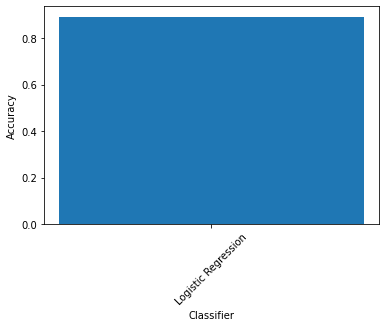

In [23]:
# Calculate accuracy for each classifier
acc_lgr = accuracy_score(y_test, y_pred_lgr)

# Plot the accuracy of each classifier
classifiers = ['Logistic Regression']
accuracies = [acc_lgr]
plt.bar(classifiers, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [21]:
acc_lgr

0.8929351784413693

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [24]:
# Initialize the classifiers
# K nearest neighbor classifier
knn_defualt_start_time=time.time()
knn_default=knn_pipe.fit(X_train,y_train)
knn_default_end_time=time.time()
knn_defualt_training_time=knn_default_end_time-knn_defualt_start_time

In [25]:
#Decision tree classifier
dtree_defualt_start_time=time.time()
dtree_default=dtree_pipe.fit(X_train,y_train)
dtree_default_end_time=time.time()
dtree_defualt_training_time=dtree_default_end_time-dtree_defualt_start_time

In [27]:
#Support vector machine classifier
svm_defualt_start_time=time.time()
svm_default=svm_pipe.fit(X_train,y_train)
svm_default_end_time=time.time()
svm_defualt_training_time=svm_default_end_time-svm_defualt_start_time

In [28]:
# Make predictions on the test and train set using the defualt parameters of the classifiersy_pred_lgr_train = lgr_default.predict(X_train)
y_pred_lgr_train = lgr_default.predict(X_train)
y_pred_knn_train = knn_default.predict(X_train)
y_pred_dtree_train= dtree_default.predict(X_train)
y_pred_svm_train= svm_default.predict(X_train)

# On test data set
y_pred_lgr_test = lgr_default.predict(X_test)
y_pred_knn_test = knn_default.predict(X_test)
y_pred_dtree_test= dtree_default.predict(X_test)
y_pred_svm_test= svm_default.predict(X_test)

In [29]:
# Calculate accuracy on the train dataset for each classifier
lgr_acc_train = accuracy_score(y_train,y_pred_lgr_train)
knn_acc_train = accuracy_score(y_train, y_pred_knn_train)
dtree_acc_train = accuracy_score(y_train, y_pred_dtree_train)
svm_acc_train = accuracy_score(y_train, y_pred_svm_train)

# Calculate accuracy on the test dataset for each classifier
lgr_acc_test = accuracy_score(y_test,y_pred_lgr_test)
knn_acc_test = accuracy_score(y_test, y_pred_knn_test)
dtree_acc_test = accuracy_score(y_test, y_pred_dtree_test)
svm_acc_test = accuracy_score(y_test, y_pred_svm_test)

In [30]:
#Create a dataFrame for each classifier, Train time,train accuracy, and test accuracy
models_evaluation_table=pd.DataFrame({'Model':['Logestic Regression','K Nearest Neighbor','Decision Tree','Support Vector Machine'],
                                       'Train Time (sec)':[lgr_defualt_training_time,knn_defualt_training_time,dtree_defualt_training_time,svm_defualt_training_time],
                                       'Train Accuracy':[lgr_acc_train,knn_acc_train,dtree_acc_train,svm_acc_train],
                                       'Test Accuracy':[lgr_acc_test,knn_acc_test,dtree_acc_test,svm_acc_test],
                                       'Baseline Classifier':[basieline_acc,basieline_acc,basieline_acc,basieline_acc]})
models_evaluation_table

Model  Train Time (sec)  Train Accuracy  Test Accuracy  \
0     Logestic Regression          0.585625        0.894003       0.892935   
1      K Nearest Neighbor          0.080644        0.912282       0.890426   
2           Decision Tree          0.240950        0.995595       0.834992   
3  Support Vector Machine         53.349359        0.900038       0.899409   

   Baseline Classifier  
0             0.803108  
1             0.803108  
2             0.803108  
3             0.803108

<Figure size 864x720 with 0 Axes>

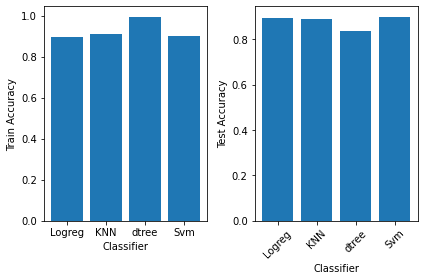

In [31]:
# Plot the accuracy of each classifier
classifiers = ['Logreg','KNN', 'dtree','Svm']
accuracies_test= [lgr_acc_test,knn_acc_test, dtree_acc_test,svm_acc_test]
accuracies_train= [lgr_acc_train,knn_acc_train, dtree_acc_train,svm_acc_train]
plt.figure(figsize=(12,10))
fig,ax = plt.subplots(nrows=1, ncols=2)
ax[0].bar(classifiers, accuracies_train)
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Train Accuracy')

ax[1].bar(classifiers, accuracies_test)
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Test Accuracy')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [32]:
#used to gues the number of neighbors require in the KNN model
math.sqrt(41188)

202.9482692707676

In [34]:
#Tunning Hyperparametrs

#The dictionaries consists 
#K nearst neibour hyperparamers dictionary
#KNN n_neighbors used ranged to 21, to save time and selected an odd number to keep the tie
#weights:the possoble weights are uniform and distance.
#P is Power parameter for the Minkowski metric. p = 1 is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
knn_params={'knnModel__n_neighbors':range(1,21,2),
            'knnModel__weights':['uniform','distance'],
            'knnModel__p':[1,2]}

#Decision tree hyperparamers dictionary
#Criterion used to measure the quality of a split. gini and entropy splitter are used
#max_depth, the classifier will check upto max depth 2,3,4
#Min_sample_split is the minimum number of samples required to split an internal node, 0.05, 0.1,0.2 are used
#min_samples_leaf is the minimum number of samples required to be at a leaf node.The mimi number of leaf checked at 1,2,3
dtree_params = {'dtreeModel__max_depth':[2,3,4],
                'dtreeModel__min_samples_split':[0.05,0.1, 0.2],
                'dtreeModel__criterion': ['gini', 'entropy'],
                'dtreeModel__min_samples_leaf':[1,2,3]}


#Logestic Regression hyperparameeter dictionanry
#l2 penalty are used
#C:Inverse of regularization strength. Smaller values specify stronger regularization
lgr_params={'lgrModel__penalty':['l2'],
            'lgrModel__C':[0.01,0.5,1,1.5,2]}

#Support vector machine hyperparamers dictionary
#Kernel:kernel type to be used 'rbf', 'poly'
#Gamma: kernel coefficient. 0,0.1. coefficients has beed tried
#coefo: Significant only in ‘poly’ and ‘sigmoid’.0,1 has been used
#degree:Degree of the polynomial kernel function . max degree checked 2,3
svm_params= {'svmModel__kernel': ['rbf','poly'],
              'svmModel__gamma': ['scale',0.1],
              'svmModel__coef0':[0,1],
              'svmModel__degree':[2,3]}

#I used this these two below alternatives, becuase the computer stack on the above SVM parameters
#Support vector machine hyperparamers dictionary
svm_poly_params= {'svmModel__kernel': ['poly'],
                 'svmModel__gamma': ['scale'],
                 'svmModel__coef0':[0],
                 'svmModel__degree':[3,4]}


In [35]:
#Preparing the gridsearch for each classifiers
#Models grid search
knn_grid=GridSearchCV(estimator=knn_pipe,
                      param_grid=knn_params,
                     cv=5)
dtree_grid=GridSearchCV(estimator=dtree_pipe,
                      param_grid=dtree_params,
                      cv=5)
lgr_grid=GridSearchCV(estimator=lgr_pipe,
                      param_grid=lgr_params,
                     cv=5)
svm_grid=GridSearchCV(estimator=svm_pipe,
                      param_grid=svm_poly_params,
                      cv=5)

In [36]:
#Train logestic regression classifier
lgr_start_time=time.time()
lgr_improved=lgr_grid.fit(X_train,y_train)
lgr_end_time=time.time()
lgr_training_time=lgr_end_time-lgr_start_time

In [37]:
#Train the classifiers
#The model trained usee 21 n neighors
knn_start_time=time.time()
knn_improved=knn_grid.fit(X_train,y_train)                                                                                                                                                                                                                                                                                                                                                                                                                                            
knn_end_time=time.time()
knn_training_time=knn_end_time-knn_start_time                                                                                                                                                                                    

In [38]:
#Train Decision tree classifier
dtree_start_time=time.time()
dtree_improved=dtree_grid.fit(X_train,y_train)
dtree_end_time=time.time()
dtree_training_time=dtree_end_time-dtree_start_time                                                

In [39]:
#Train Support Vector machine classifier
svm_start_time=time.time()
svm_improved=svm_grid.fit(X_train,y_train)
svm_end_time=time.time()
svm_training_time=svm_end_time-svm_start_time

In [40]:
#Models best parameters
print(f'Logestic Regression best parameters:{lgr_improved.best_params_}')
print(f'KNN best parameters:{knn_improved.best_params_}')
print(f'Decision Tree best parameters:{dtree_improved.best_params_}')
print(f'Support vector machine best parameters:{svm_improved.best_params_}')

Logestic Regression best parameters:{'lgrModel__C': 0.01, 'lgrModel__penalty': 'l2'}
KNN best parameters:{'knnModel__n_neighbors': 17, 'knnModel__p': 2, 'knnModel__weights': 'uniform'}
Decision Tree best parameters:{'dtreeModel__criterion': 'gini', 'dtreeModel__max_depth': 3, 'dtreeModel__min_samples_leaf': 1, 'dtreeModel__min_samples_split': 0.05}
Support vector machine best parameters:{'svmModel__coef0': 0, 'svmModel__degree': 3, 'svmModel__gamma': 'scale', 'svmModel__kernel': 'poly'}


In [41]:
#Models best score
print(f'Logestic Regression best score:{lgr_improved.best_score_}')
print(f'KNN best score:{knn_improved.best_score_}')
print(f'Decision Tree best score:{dtree_improved.best_score_}')
print(f'Support vector machine best score:{svm_improved.best_score_}')

Logestic Regression best score:0.8944539424708898
KNN best score:0.8985467628590698
Decision Tree best score:0.9001422087623909
Support vector machine best score:0.8983733203755191


In [42]:
#Models training time
{'KNN training time in seconds':knn_training_time,
'Decision Tree training time in seconds':dtree_training_time,
'Logestic Regression trainng time in seconds':lgr_training_time,
'Support vector machine training time in seconds':svm_training_time}

{'KNN training time in seconds': 226.73126935958862,
 'Decision Tree training time in seconds': 28.096494913101196,
 'Logestic Regression trainng time in seconds': 13.304939031600952,
 'Support vector machine training time in seconds': 202.6206305027008}

In [43]:
# Make predictions on the train set
y_pred_lgr_train= lgr_improved.predict(X_train)
y_pred_knn_train = knn_improved.predict(X_train)
y_pred_dtree_train= dtree_improved.predict(X_train)
y_pred_svm_train = svm_improved.predict(X_train)

# Make predictions on the test set
y_pred_lgr = lgr_improved.predict(X_test)
y_pred_knn = knn_improved.predict(X_test)
y_pred_dtree = dtree_improved.predict(X_test)
y_pred_svm = svm_improved.predict(X_test)

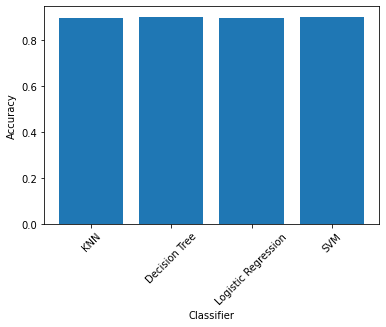

In [44]:
# Calculate accuracy for each classifier
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_lgr = accuracy_score(y_test, y_pred_lgr)
acc_dtree = accuracy_score(y_test, y_pred_dtree)
acc_svm = accuracy_score(y_test, y_pred_svm)

acc_knn_train = accuracy_score(y_train, y_pred_knn_train)
acc_lgr_train = accuracy_score(y_train, y_pred_lgr_train)
acc_dtree_train = accuracy_score(y_train, y_pred_dtree_train)
acc_svm_train = accuracy_score(y_train, y_pred_svm_train)

# Plot the accuracy of each classifier
classifiers = ['KNN', 'Decision Tree','Logistic Regression' ,'SVM']
accuracies = [acc_knn, acc_dtree, acc_lgr,acc_svm]
plt.bar(classifiers, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [45]:
#classification report for KNN model
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10968
           1       0.60      0.24      0.35      1389

    accuracy                           0.90     12357
   macro avg       0.76      0.61      0.64     12357
weighted avg       0.88      0.90      0.88     12357



Precision of the model

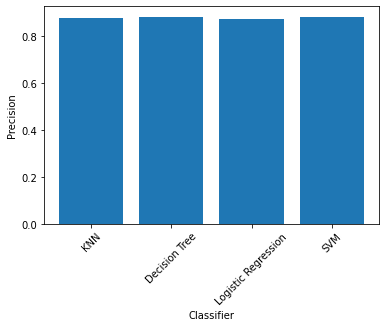

In [46]:
# Calculate precision for each classifier
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
precision_lgr = precision_score(y_test, y_pred_lgr, average='weighted')
precision_dtree = precision_score(y_test, y_pred_dtree, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

# Plot the precision of each classifier
classifiers = ['KNN', 'Decision Tree','Logistic Regression' ,'SVM']
precision = [precision_knn, precision_dtree,precision_lgr, precision_svm]
plt.bar(classifiers, precision)
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()

Recall of the Models

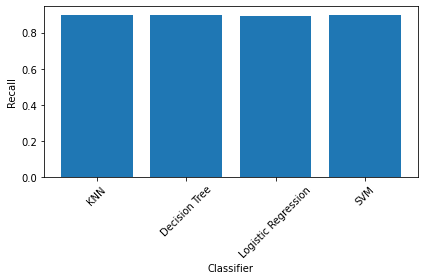

In [47]:
# Calculate recall for each classifier
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
recall_lgr = recall_score(y_test, y_pred_lgr, average='weighted')
recall_dtree = recall_score(y_test, y_pred_dtree, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Plot the recall of each classifier
classifiers = ['KNN', 'Decision Tree','Logistic Regression' ,'SVM']
precision = [recall_knn, recall_dtree,recall_lgr, recall_svm]
plt.bar(classifiers, precision)
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

F1 score of the models

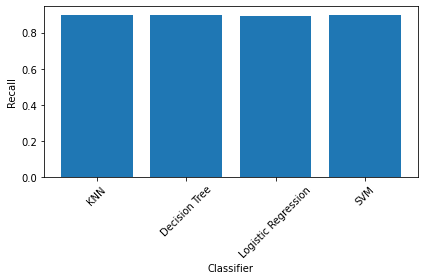

In [48]:
# Calculate F1 score for each classifier
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
f1_lgr = f1_score(y_test, y_pred_lgr, average='weighted')
f1_dtree = f1_score(y_test, y_pred_dtree, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Plot the f1 score of each classifier
classifiers = ['KNN', 'Decision Tree','Logistic Regression' ,'SVM']
precision = [recall_knn, recall_dtree,recall_lgr, recall_svm]
plt.bar(classifiers, precision)
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
#Create a dataFrame for each improved classifier, Train time,train accuracy, and test accuracy
Model_improved_evaluation_table=pd.DataFrame({'Model':['Logestic Regression','K Nearest Neighbor','Decision Tree','Support Vector Machine'],
                                       'Train Time (sec)':[lgr_training_time,knn_training_time,dtree_training_time,svm_training_time],
                                       'Train Accuracy':[acc_lgr_train,acc_knn_train,acc_dtree_train,acc_svm_train],
                                       'Test Accuracy':[acc_lgr,acc_knn,acc_dtree,acc_svm]})
Model_improved_evaluation_table

Model  Train Time (sec)  Train Accuracy  Test Accuracy
0     Logestic Regression         13.304939        0.894731       0.894796
1      K Nearest Neighbor        226.731269        0.903056       0.896820
2           Decision Tree         28.096495        0.900212       0.899166
3  Support Vector Machine        202.620631        0.903160       0.900542

In [53]:
#Create a dataFrame for each improved classifier, Train time,train accuracy, and test accuracy
metrics_evaluation_table=pd.DataFrame({'Model':['Logestic Regression','K Nearest Neighbor','Decision Tree','Support Vector Machine','Baseline Classifier'],
                                       'Test Accuracy':[acc_lgr,acc_knn,acc_dtree,acc_svm,basieline_acc],
                                       'Test Precision':[precision_lgr,precision_knn,precision_dtree,precision_svm,baseline_pre],
                                       'Test Recall':[recall_lgr,recall_knn,recall_dtree,recall_svm,baseline_rec],
                                       'Test F1 Score':[f1_lgr,f1_knn,f1_dtree,f1_svm,baseline_f1]})
metrics_evaluation_table

Model  Test Accuracy  Test Precision  Test Recall  \
0     Logestic Regression       0.894796        0.874350     0.894796   
1      K Nearest Neighbor       0.896820        0.876066     0.896820   
2           Decision Tree       0.899166        0.881266     0.899166   
3  Support Vector Machine       0.900542        0.882975     0.900542   
4     Baseline Classifier       0.803108        0.888131     0.890317   

   Test F1 Score  
0       0.860890  
1       0.876683  
2       0.872840  
3       0.877192  
4       0.889223

In [54]:
#Confusion Matrix
lgr_confusion=confusion_matrix(y_test,y_pred_lgr)
knn_confusion=confusion_matrix(y_test,y_pred_knn)
dtree_confusion=confusion_matrix(y_test,y_pred_dtree)
svm_confusion=confusion_matrix(y_test,y_pred_svm)

In [55]:
#Confusion Matrix display
lgr_disp=ConfusionMatrixDisplay(lgr_confusion)
knn_disp=ConfusionMatrixDisplay(knn_confusion)
dtree_disp=ConfusionMatrixDisplay(dtree_confusion)
svm_disp=ConfusionMatrixDisplay(svm_confusion)

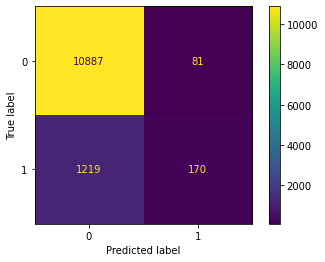

In [57]:
#Logestic Regression Confusion Matrix display
lgr_disp=ConfusionMatrixDisplay(lgr_confusion)
lgr_disp.plot()
plt.show()

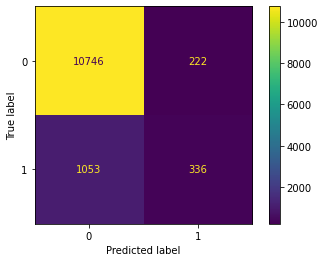

In [58]:
#K Nearest Neighbor Confusion Matrix display
knn_disp=ConfusionMatrixDisplay(knn_confusion)
knn_disp.plot()
plt.show()

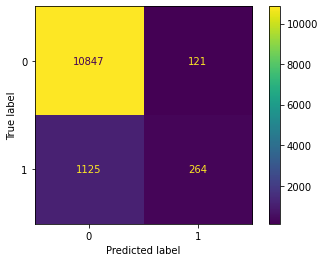

In [59]:
# Decision Tree Confusion Matrix display
dtree_disp=ConfusionMatrixDisplay(dtree_confusion)
dtree_disp.plot()
plt.show()

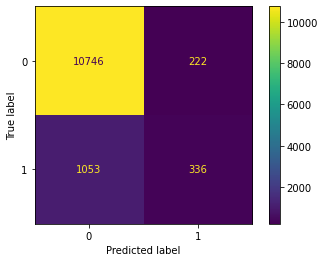

In [60]:
#Support Vector Machine Confusion Matrix display
svm_disp=ConfusionMatrixDisplay(svm_confusion)
knn_disp.plot()
plt.show()

In [72]:
#calcaulate the probability prediction of the llogestic regression model
probs_lgr=lgr_improved.predict_proba(X_test)
probs_df=pd.DataFrame(probs_lgr)
probs_df.head()

0         1
0  0.926612  0.073388
1  0.974325  0.025675
2  0.909812  0.090188
3  0.946974  0.053026
4  0.936524  0.063476

In [83]:

new_test_preds = np.where(probs_lgr[:,1] >.28, 1,0)
new_test_fp = 0
for i, j in zip(new_test_preds, y_test):
    if i == 1:
        if j == 0:
            new_test_fp += 1
print(new_test_fp)

699


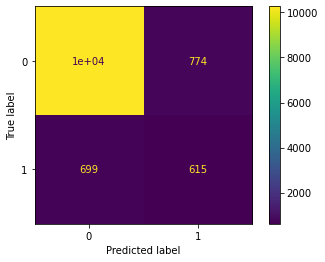

In [84]:
# Test new prediction
conf_matrix=confusion_matrix(new_test_preds,y_test,labels=lgr_improved.classes_)
disp_new=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp_new.plot()
plt.show()

In [87]:
#New metrics evaluation 
proba_acc_lgr=accuracy_score(y_test,new_test_preds)
proba_pre_lgr=precision_score(y_test,new_test_preds,average='weighted')
proba_rec_lgr=recall_score(y_test,new_test_preds,average='weighted')
proba_f1_lgr=f1_score(y_test,new_test_preds,average='weighted')

In [88]:
#Create a dataFrame for each improved classifier, Train time,train accuracy, and test accuracy
proba_evaluation_table=pd.DataFrame({'Model':['Logestic Regression','Baseline Classifier'],
                                       'Test Accuracy':[proba_acc_lgr,basieline_acc],
                                       'Test Precision':[proba_pre_lgr,baseline_pre],
                                       'Test Recall':[proba_rec_lgr,baseline_rec],
                                       'Test F1 Score':[proba_f1_lgr,baseline_f1]})
proba_evaluation_table

Model  Test Accuracy  Test Precision  Test Recall  \
0  Logestic Regression       0.880796        0.877993     0.880796   
1  Baseline Classifier       0.803108        0.888131     0.890317   

   Test F1 Score  
0       0.879346  
1       0.889223

<AxesSubplot: >

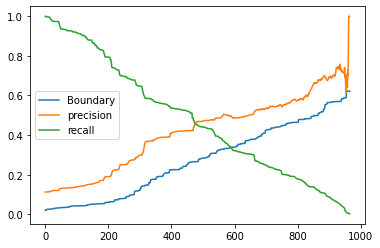

In [97]:
#Evaluation Curves: Precision vs Recall
# Precision vs Recallfunction takes in y_true and y_score which can be predicted probabilities.
precision, recall, boundaries = precision_recall_curve(y_test, probs_lgr[:,1], pos_label=1)
# check the length of the boundaries 
len(boundaries)
p_r_result_df=pd.DataFrame({'Boundary':boundaries,'precision':precision[:966],'recall':recall[:966]})
p_r_result_df.plot()

<AxesSubplot: >

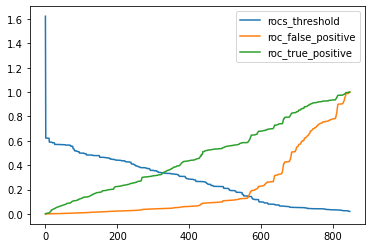

In [95]:
#ROC Curve
#Similar to the precision_recall_curve the roc_curve function takes in y_true and y_score which can be predicted probabilities.
# The function returns the false positive rates, true positive rates, and thresholds. Assign these to fpr, tpr, and thresh_rocs below. 
# Uncomment the code to visualize the ROC curve.
fpr,tpr,Threshold_rocs=roc_curve(y_test, probs_lgr[:,1], pos_label=1)
len(Threshold_rocs)
roc_result_df=pd.DataFrame({'rocs_threshold':Threshold_rocs,'roc_false_positive':fpr,'roc_true_positive':tpr})
roc_result_df.plot()

In [100]:
roc_grid = GridSearchCV(lgr_pipe,param_grid=lgr_params,scoring = 'roc_auc', cv=5)
roc_grid.fit(X_train, y_train)
best_k =roc_grid.best_score_
best_k

0.7906862398406826

# Questions

1. Does the logestic Regression model performance imporve, if we use a kernelized Logestic Regression?
2. Does the Decision tree model performance imporve if we go deeper?what happen the processing time?
3. Does a K nearest Neighbor model performance improve if the number of neighbors increases?, what about the processing time?
4. Does the Support vector Machine model is the best model comparing the above three models?
5. What happen the Bais-variance trad off of all models, as the complexity of the model increase?